# File I/O

## Recap

Over the past few weeks, we've covered lots of basic computation ideas and `python` structures.  Here's a not-even-close-to-comprehensive list:
- basic mathematical operations
- function definition
- iteration and recursion with loop control structures `for` and `while`
- keeping track of variables outside of loops (i.e., counting and summing)
- function definition and using function *inside* of loops
- conditionals with `if`, `else`, and `elif`
- types: `int`, `float`, `string`
- containers such as `list` and `dict`
- accessing and iterating over elements in lists and dicts

We have two main foundational skills left to cover before we head off into the unknown.  This week, we'll look at how to perform file input and output, usually referred to as file I/O.

### A quick comment on IDEs

So far, we've been working in Jupyter notebooks, which are a great format for inermingling markdown (text) and code.  This isn't the way that most software development happens, though.
More often, we write software as stand-alone programs (*i.e.*, code only) that can be run on any platform.
To do so in this class, we'll use the interactive development environment (IDE) Spyder\* that I'll demonstrate now.
Daily class work will still happen in notebooks, but you should consider doing and handing your homework in as separate programs (with `.py` file extension). 

\*You can also use PyCharm.\*\*

\*\*Or any other IDE you'd like.  There are lots of great options, and lots of great tutorial videos on YouTube.

* * *

## File I/O

Most modern research fields involve collecting data and then "analyzing" this data to produce results.  A straight-forward example would be something like the US Census; data (information from each household) is collected, and then an analysis is performed to produce aggregate results like income distributions, demographics, *etc.*  Very rarely in physics are collected data and results the same thing.

You may have analyzed data earlier in your life with a spreadsheet program like Excel, and this is fine for some tasks.
When datasets get LARGE or one is interested in more sophisticated or multi-dimensional analyses, Excel (or similar) is inefficient, confusing, incapable, and in some cases dangerous.

We've now seen that computers are better than humans at completing repetitive, tedious tasks.
Computers are also arguiably better than humans at relibly storing and retrieving data.  Once we've generated a large dataset, we want to store it in a file, and (hopefully) retreive that data for later analysis.  These activities are usually referred to as "File Input/Output" or "File I/O".

### Writing to file
Writing to file is simple with `python`.  Check out this block of code:

In [1]:
outputfile = open("testfile.txt", "w")
statement = "Hello, world!"
outputfile.write(statement)
outputfile.close()

The first line creates/opens a new file called `testfile.txt`.  I've told python to open the file in write mode by specifying the `"w"`, meaning that `python` can expect to only be putting info *into* the file.  The third line writes the text 
> Hello, world!

into the file.  The fourth line closes the file, i.e., tells `python` that we're done with it for now.  When you run this code, you should find that there's a new file `testfile.txt` in the same directory where this notebook file lives.  If not, you've got problems; figure them out before proceeding.

Even if it *did* work, do this problem:

#### Warm-up problem
Write a snippet of code that creates a new file called `tonz_of_numberz.txt` and writes 100000 random numbers between 0 and 1 into it.  Each line of the file should be a single number.



In [2]:
# put your warm-up code here

***
### Strings (are things)
Last week, we introdcued the `string` data type.  As a reminder, a string is a string of alpha-numeric characters. In the code snippet above, we set the value of the variable statement to be something that definitely wasn't a number ("Hello world!").  In fact, when `python` writes anything (even a number) to file, if first converts it to a string.  When `python` reads anything (even something that is obviously (to you or me) is a number) from file, it does so as a string.  So, when performing file I/O we sometimes need to be careful to convert to/from strings.

As a reminder, strings can be manipulated in cute arithmetic-looking ways:

In [3]:
str1 = "house"
str2 = "cat"
str3 = str1 + str2
print("I have a " + str3)

I have a housecat


Strings can be manipulated like this.  In general when we set the value of a variable to be anything in quotes, that variable type is a string.

One must be careful when mixing strings and other types, though.  For example, the last line of the block below *looks* sensible, but it will fail.  Uncomment and try!

In [4]:
number_of_cats = 904
sentence1 = "I have "
sentence2 = " housecats."
#print(sentence1 + number_of_cats + sentence2)

Oops!  `python` doesn't quite know how to combine strings and ints in this case.  I have to be a bit more specific/careful and convert my `int` to a `str`:

In [5]:
print(sentence1 + str(number_of_cats) + sentence2)

I have 904 housecats.


See what I did there?  Doing something like `str(904)` converts (or "casts") the number to a string that can then be written, printed, or read.  In some cases, `python` is smart enough to figure out what you mean; in others it can't.  While the above `print` structure doesn't work, the one below does:

In [6]:
print(sentence1, number_of_cats, sentence2)

I have  904  housecats.


There are lots of fun things that one can do with strings.  Here are some examples for you to decipher.

In [7]:
number = 43185726
string1 = str(number)
print(string1)
print(len(string1))
print(string1.isalpha())
print(string1.isdigit())
print(string1[0])
print(string1[3])
print(string1[-2])
print(string1[2:6])

43185726
8
False
True
4
8
2
1857


The last few lines show how to access individual characters of a string.  (If you remember working with lists/arrays, you might think of strings as lists of individual characters.)  

`string1[3]` returns the (zero, one, two) third character in the string.  This can be quite useful.

There's one last string feature that I want to highlight because we'll use it below (and probably weekly thereafter).  The `string` type has a method (a function that belongs to it) called `split()`.  Check out what `split()` does:

In [8]:
smoothie_ingreds = "apple, spinach, carrot, yogurt, blueberries, protein powder, motor oil, honey"
print(smoothie_ingreds)
print()

ingreds_array = smoothie_ingreds.split(",")
for ingred in ingreds_array:
    print(ingred.strip())

apple, spinach, carrot, yogurt, blueberries, protein powder, motor oil, honey

apple
spinach
carrot
yogurt
blueberries
protein powder
motor oil
honey


So, `split(",")` splits a string into an array at each location where there's a ",".  Comma isn't special here, you could split on any character that you want!  Tyr it.  It might not be clear how this could possibly be useful; just wait.

Btw, can you tell what `strip()` does above?

***

### Reading from file

Now that you can make files and write to them, you may want to re-access that delicious stored information.  How to do this?  Simple!  Let's see what's in that old `testfile.txt`...

In [9]:
inputfile = open("testfile.txt", "r")
line = inputfile.readline()
print(line)
inputfile.close()

Hello, world!


Note the symmetry with the code block above for writing to file.  You probably could have guessed how to do this just by knowing the write syntax and knowing the verbs "read" and "write". 

`readline()` is a very useful function for... well, reading lines from a file.  Each time it is called/used, it reads in the *next* line in the file until there are no more lines to read.  It is convenient to implement in something like a `while` loop.

* * *

Okay!  Here is another warm-up problem:

#### Another warm-up problem

Read in all of the numbers in the file `tonz_of_numberz.txt` (you made that file, right?) and count how many are greater than 0.75.  

In [10]:
# put your warm-up code here

#### Yet more warm-up 
Read in all of the numbers in the file `tonz_of_numberz.txt` and count the number that have a '3' in their thenths place.  Can you justify the count?


In [11]:
# put your warm-up code here

#### OK, last warm-up problem
Read in all of the numbers in the file `tonz_of_numberz.txt` and count the number that have the numeral '3' anywhere in them.  Can you justify the count?

In [12]:
# put your warm-up code here

#### I lied, one more warm-up problem
Read in all of the numbers in the file tonz_of_numberz.txt and check to see how many of them begin with 0.1234.  Can you justify the count?

In [13]:
# put your warm-up code here

****

## Reading in tabular data 
Often in the sciences we deal with large files that represent large datasets.  You can picture a spreadsheet in which information is organized in rows and columns.  Data organized like this is said to be "tabular", *i.e.* arange into a table.  Typically, we think of each row as being a single instance or event in the dataset, and each column representing the different features that describe/characterize the instances/events.  Here's an example of what I'm talking about:

|name |class year |seating row |is cool |
|---|---|---|---|
|Alex|senior|0|1|
|Abdoul|sophomore|2|1|
|Aiden|sophomore|2|1|
|Aimee|sophomore|1|1|
|Gannon|sophomore|1|1|
|Gaurav|sophomore|1|1|
|Gia|sophomore|0|1|
|Maddy|first-year|0|1|

In order to work with data like this, you might use a graphical spreadsheet program.  What would you do, however, if your spreadsheet had data for tens of thousands of events (or more), each with multiple features?  Programs like Excel can be quite cumbersome or even unworkable for "big" data.

Programming allows us to read in data and perform calculations easily and reliably.  In most cases we can look at a block of code and know **exactly** what is being done to each datum that is read in from file.  

The following block of code reads in the data in the file `parab_t_and_y.txt`, and makes a graph of the second column's information (position) versus the first column's position.  The data are stored as two lists of numbers (one for t and one for x).  Python can only read in strings, so we'll split each line into two strings and then convert them to floats.  Make sure that you understad each line of the code below before proceeding.  We will talk about the data visualization stuff next week -- for now, we're just using the graph to show what's possible.

Be sure to download the data file and put it in the same directory as this notebook!

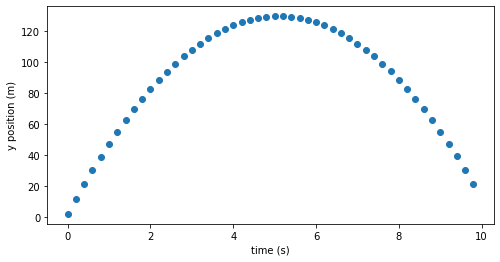

In [14]:
import numpy as np

in_file = open("data_files/parab_t_and_y.txt", "r")
t_list = []
y_list = []
line = in_file.readline()        # read in the first line
while len(line) > 1:             # keep doing loop until there's no more data in the file
    line_list = line.split(",")  # split the string at each comma
    t = float(line_list[0])      # convert time string to a float
    y = float(line_list[1])      # convert position string to a float
    t_list.append(t)       
    y_list.append(y)
    line = in_file.readline()
    
# everything below here we'll worry about next week...
import matplotlib.pyplot as plt
t_arr = np.array(t_list)         
y_arr = np.array(y_list)         

fig = plt.figure(figsize=(8,4))
plt.plot(t_arr, y_arr, 'o')
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.show()

The data file that was read in above is a "csv" or "comma-separated-value" file.  This is very similar to the way that, say, Excel stores data, but we're able to access it directly.   : )

`python` offers some really elegant ways of dealing with strings, but the basic tools in the code block above are soooooo useful.  We'll return to them next week.

**Now you may ask yourself** why on Earth would I go to the trouble of programming in `python` something simple like this?  Couldn't I do this with Excel in 5-ish minutes?  That is truly a great question.  Here are two possible answers:
1. In this one block of code, we've basically reached the limit of what Excel is capable of in terms of both graphing and formatting.  With general programming structures, however, the possibilities and opportunities for sophistication are endless.
2. Suppose we now want to graph a trajectory that of $10^6$ data points?  Can Excel handle that?  Well, you'd first have to load the data into Excel, then apply whatever calculations you need to do, then call up a graph.  With the `python` code above, we simply change the name of the data file we want to access.  Easy. Peasy. Lemon squeezy.

***

## Problems

Your homework for next week is to complete 3 of the following problems.  You do *not* have to do all of them.

### Regulars

1. The file `wash_pa_temps_only.csv` contains temperature data from a weather station in Washington, PA for the years 2000-2009.  Write a block of code that reads in the data from this file and computes the average and standard deviation for high and low temperatures.  Your code should print these averages to screen in a nicely formatted way.  Recall/behold that the standard deviation of quantity $x$ with average value $\bar{x}$ is given by
\begin{equation}
\sigma^2 = \displaystyle \frac{\sum_{i=1}^{i=N}\left(x_i - \bar{x}\right)^2}{N-1}
\end{equation}
1. Write a block of code that reads in the Washington, PA weather data and computes the average high temperature and average low temperature for each month.  Your code should print something like
> January  [average high]   [standard dev high]   [average low]   [standard dev low] \
February   [average high]   [standard dev high]   [average low]   [standard dev low] \
...
1. The file `NBA_game_data_2000-2014.csv` contains NBA game data (teams, dates, scores) from 15 seans of regular and post-season play. That's nearly 20k games!  Let's say that your instructor believes that the outcomes of some NBA games are determined by non-competitive factors (*i.e.*, some of the games are rigged).  Calculate the following quantities to begin investigating:
    - total number of games
    - fraction of total games that are won by ~less~ fewer than 3 points
    - fraction of total games that are won by the home team

### Semi-meanies

4. To prevent cheating, a casino monitors the outcomes of dice rolls at one of its craps tables.  Outcomes for 10000 rolls are given in the file `dice_data.txt`.  Read in this file and determine the following:
    - How many times did the thrower roll snake eyes (1 and 1)?
    - How many times did the thrower roll box cars (6 and 6)?
    - How many times did the thrower roll dice totaling 7?
    - You now own this casino.  After reviewing the data, do you suspect that something fishy is going on?  Explain with quantitative evidence.  For example, if the dice are fair, how often *should* each of the outcomes in parts a-c happen?

### Meanies
5. Return to the dice data from problem 4.  Which die do you suspect of being unfair?  Support your claim with quantitative evidence.

#### Mega-meanies

6. Return to the dice data from problem 4.  Do you have reason to believe that one of the croupiers is responsible for cheating?  Support your claim with quantitative evidence.
7. Return to the NBA game data from problem 3. Calculate:
    - number of games in which the home team won
    - fraction of games that went to overtime
    - fraction of home-team wins in which the home team was losing at the beginning of the 4th quarter
    - fraction of games that the LA Lakers (most likely cheaters in the league) come from behind in the 4th quarter and won
